In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Objectives of analysis

*Unerstanding the dataset 
*Clean & prepocess the data 
*Once dataset is cleaned and preprocessed answers the following

1.what is overall trends
2.which are top 10 products by sales
3.which are the most selling products by quantity 
4.which is the most preffered shipping method 
5.which are the most profitable categories and sub categories 
6.which are the less profitable categories and sub categories
7.which are the bottom 10 products by the sales 
8.which are the least selling products by the quantity.

# Step1: Load the dataset

In [30]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
url='/home/pratibhaantre/Documents/superstore_sales.xlsx'
df=pd.read_excel(url)
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2.0,0.0,106.1400,35.460,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3.0,0.1,36.0360,9.720,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4.0,NaN,29.6400,8.170,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3.0,0.5,-26.0550,4.820,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5.0,0.1,37.7700,4.700,Medium,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2.0,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1.0,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3.0,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1.0,0.0,0.5600,0.199,Medium,2014


In [32]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2.0,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3.0,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4.0,NaN,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3.0,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5.0,0.1,37.770,4.70,Medium,2011


In [33]:
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2.0,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1.0,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3.0,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1.0,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3.0,0.2,-0.6048,0.170,Medium,2014


In [34]:
df.shape

(51290, 21)

In [35]:
df.size

1077090

In [36]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51254 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

# Step2: Clean and preproces the dataset

In [38]:
#check if there any duplicates records or not

In [39]:
print('shape of original dataset',df.shape)
df=df.drop_duplicates()
print('shape of dataset after drooping duplicates',df.shape)

shape of original dataset (51290, 21)
shape of dataset after drooping duplicates (51290, 21)


In [40]:
#check for missing values
df.isnull().sum()

order_id            0
order_date          0
ship_date           0
ship_mode          36
customer_name       0
segment             0
state               0
country             0
market              0
region              0
product_id          0
category            0
sub_category        0
product_name        0
sales               0
quantity           31
discount          188
profit              0
shipping_cost       0
order_priority     13
year                0
dtype: int64

In [41]:
df.isnull().sum().sum()/len(df)*100

0.5225190095535192

In [42]:
#in our dataset missing values are ship_mode,quantity,discount and order_priority

# impute the missing values in shipping_mode

In [48]:
df.ship_mode.unique()

array(['Standard Class', 'Second Class', 'Same Day', nan, 'First Class'],
      dtype=object)

In [49]:
df.ship_mode.value_counts()

Standard Class    30739
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

<AxesSubplot:xlabel='ship_mode', ylabel='count'>

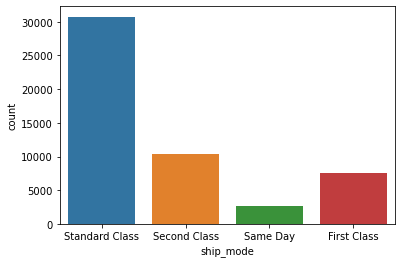

In [50]:
sns.countplot(x='ship_mode',data=df)

In [51]:
df.ship_mode=df.ship_mode.fillna('Standard Class')

In [52]:
df.isnull().sum()

order_id            0
order_date          0
ship_date           0
ship_mode           0
customer_name       0
segment             0
state               0
country             0
market              0
region              0
product_id          0
category            0
sub_category        0
product_name        0
sales               0
quantity           31
discount          188
profit              0
shipping_cost       0
order_priority     13
year                0
dtype: int64

# impute the missing values in quntity

In [53]:
df.quantity.unique()

array([ 2.,  3.,  4.,  5., nan,  1.,  7.,  6.,  8.,  9., 10., 11., 12.,
       14., 13.])

In [54]:
df.quantity.value_counts()

2.0     12748
3.0      9682
1.0      8932
4.0      6385
5.0      4882
6.0      3020
7.0      2385
8.0      1361
9.0       987
10.0      276
14.0      186
12.0      176
11.0      156
13.0       83
Name: quantity, dtype: int64

In [55]:
df.quantity=df.quantity.fillna(1)

In [56]:
df.isnull().sum()

order_id            0
order_date          0
ship_date           0
ship_mode           0
customer_name       0
segment             0
state               0
country             0
market              0
region              0
product_id          0
category            0
sub_category        0
product_name        0
sales               0
quantity            0
discount          188
profit              0
shipping_cost       0
order_priority     13
year                0
dtype: int64

In [58]:
#impute the missing values in discounts

In [59]:
df.discount.unique()

array([0.   , 0.1  ,   nan, 0.5  , 0.4  , 0.45 , 0.55 , 0.47 , 0.002,
       0.6  , 0.2  , 0.8  , 0.17 , 0.25 , 0.7  , 0.402, 0.35 , 0.27 ,
       0.15 , 0.37 , 0.65 , 0.3  , 0.07 , 0.602, 0.32 , 0.202, 0.57 ,
       0.85 ])

In [60]:
df.discount=df.discount.fillna(0)

In [61]:
df.isnull().sum()

order_id           0
order_date         0
ship_date          0
ship_mode          0
customer_name      0
segment            0
state              0
country            0
market             0
region             0
product_id         0
category           0
sub_category       0
product_name       0
sales              0
quantity           0
discount           0
profit             0
shipping_cost      0
order_priority    13
year               0
dtype: int64

In [62]:
#impute the missing values in order priority

In [63]:
df.order_priority.unique()

array(['Medium', 'High', 'Critical', nan, 'Low'], dtype=object)

In [64]:
df.order_priority=df.order_priority.fillna('low')

In [65]:
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [67]:
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


# 1.What is overall sales trends

In [68]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [69]:
df.year.unique()

array([2011, 2012, 2013, 2014])

In [70]:
df.order_date.min()

Timestamp('2011-01-01 00:00:00')

In [71]:
df.order_date.max()

Timestamp('2014-12-31 00:00:00')

In [72]:
df.order_date.head()

0   2011-01-01
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
Name: order_date, dtype: datetime64[ns]

In [5]:
df['year_month']=df['order_date'].apply(lambda x:x.strftime('%y-%m'))

In [75]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,year_month
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2.0,0.0,106.140,35.46,Medium,2011,11-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3.0,0.1,36.036,9.72,Medium,2011,11-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4.0,0.0,29.640,8.17,High,2011,11-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3.0,0.5,-26.055,4.82,High,2011,11-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5.0,0.1,37.770,4.70,Medium,2011,11-01


In [6]:
df.year_month.unique()

array(['11-01', '11-02', '11-03', '11-04', '11-05', '11-06', '11-07',
       '11-08', '11-09', '11-10', '11-11', '11-12', '12-01', '12-02',
       '12-03', '12-04', '12-05', '12-06', '12-07', '12-08', '12-09',
       '12-10', '12-11', '12-12', '13-01', '13-02', '13-03', '13-04',
       '13-05', '13-06', '13-07', '13-08', '13-09', '13-10', '13-11',
       '13-12', '14-01', '14-02', '14-03', '14-04', '14-05', '14-06',
       '14-07', '14-08', '14-09', '14-10', '14-11', '14-12'], dtype=object)

In [7]:
df_sales_trends=df.groupby('year_month').sum()['sales'].reset_index()

In [8]:
df_sales_trends

,year_month,sales
0,11-01,98898.48886
1,11-02,91152.15698
2,11-03,145729.36736
3,11-04,116915.76418
4,11-05,146747.83610
5,11-06,215207.38022
6,11-07,115510.41912
7,11-08,207581.49122
8,11-09,290214.45534
9,11-10,199071.26404


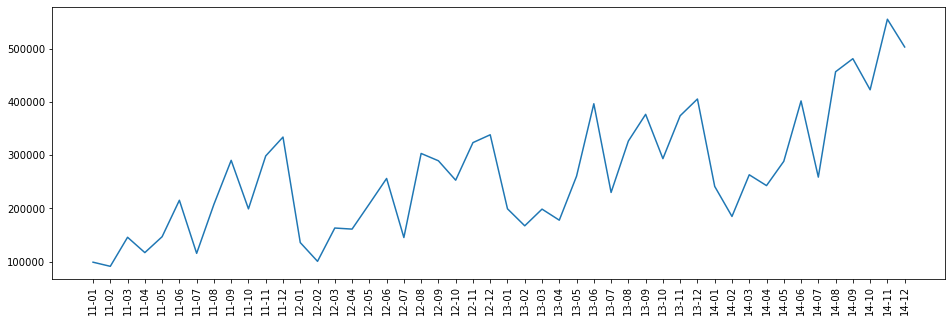

In [13]:
plt.figure(figsize=(16,5))
plt.plot(df_sales_trends.year_month,df_sales_trends.sales)
plt.xticks(rotation='vertical')
plt.show()

conclusion: In every year first 4-5 months there is low in sales but rest of the months increasing.

# Which are top 10 products by the sales(quantity

In [14]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'year_month'],
      dtype='object')

In [16]:
df.product_name.value_counts()

Staples                                              227
Cardinal Index Tab, Clear                             92
Eldon File Cart, Single Width                         90
Rogers File Cart, Single Width                        84
Ibico Index Tab, Clear                                83
                                                    ... 
Xerox 1926                                             1
Hon Round Table, Adjustable Height                     1
Eureka Hand Vacuum, Bagless                            1
Xerox 1932                                             1
Holmes Harmony HEPA Air Purifier for 17 x 20 Room      1
Name: product_name, Length: 3788, dtype: int64

In [29]:
df.groupby('product_name').sum()['quantity']

product_name
"While you Were Out" Message Book, One Form per Page                                                    8.0
#10 Gummed Flap White Envelopes, 100/Box                                                               11.0
#10 Self-Seal White Envelopes                                                                          10.0
#10 White Business Envelopes,4 1/8 x 9 1/2                                                             32.0
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                37.0
                                                                                                       ... 
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    24.0
iOttie HLCRIO102 Car Mount                                                                             12.0
iOttie XL Car Mount                                                                                    14.0
invisibleSHIELD

In [6]:
df_prod_quant=pd.DataFrame(df.groupby('product_name').sum()['quantity'])
df_prod_quant

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8.0
"#10 Gummed Flap White Envelopes, 100/Box",11.0
#10 Self-Seal White Envelopes,10.0
"#10 White Business Envelopes,4 1/8 x 9 1/2",32.0
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37.0
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",24.0
iOttie HLCRIO102 Car Mount,12.0
iOttie XL Car Mount,14.0


In [39]:
df_prod_quant=df_prod_quant.sort_values(by=['quantity'],ascending=False)

In [40]:
df_prod_quant.head(10)

,quantity
product_name,
Staples,876.0
"Cardinal Index Tab, Clear",337.0
"Eldon File Cart, Single Width",321.0
"Rogers File Cart, Single Width",262.0
"Sanford Pencil Sharpener, Water Color",259.0
"Stockwell Paper Clips, Assorted Sizes",253.0
"Avery Index Tab, Clear",252.0
"Ibico Index Tab, Clear",251.0
"Smead File Cart, Single Width",250.0


# 3.Which are the most selling products (quantity)

In [7]:
df_prod_quant=df_prod_quant.sort_values(by=['quantity'],ascending=False)
df_prod_quant

,quantity
product_name,
Staples,876.0
"Cardinal Index Tab, Clear",337.0
"Eldon File Cart, Single Width",321.0
"Rogers File Cart, Single Width",262.0
"Sanford Pencil Sharpener, Water Color",259.0
...,...
Penpower WorldCard Pro Card Scanner,1.0
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1.0
Boston 1900 Electric Pencil Sharpener,1.0


# 4.which is the most preffered shipping method

In [8]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [9]:
df.ship_mode.value_counts()

Standard Class    30739
Second Class      10309
First Class        7505
Same Day           2701
Name: ship_mode, dtype: int64

<AxesSubplot:xlabel='ship_mode', ylabel='count'>

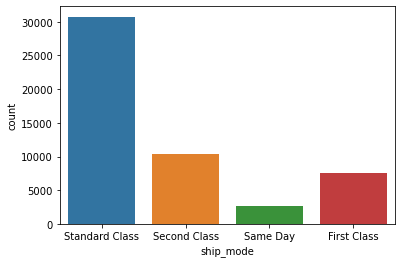

In [10]:
sns.countplot(x='ship_mode',data=df)

Conclusion:standard class is the most preffered shiping method

# 5.Which are the most profitable categories and sub_category

In [11]:
df.groupby(['category','sub_category']).sum()

sales  quantity  discount        profit  \
category        sub_category                                                   
Furniture       Bookcases     1.466572e+06    8309.0   370.710  161924.41950   
                Chairs        1.501682e+06   12336.0   560.120  141973.79750   
                Furnishings   3.855783e+05   11222.0   478.880   46967.42550   
                Tables        7.570419e+05    3083.0   250.320  -64083.38870   
Office Supplies Appliances    1.011064e+06    6077.0   248.700  141680.58940   
                Art           3.720920e+05   16296.0   573.080   57953.91090   
                Binders       4.619115e+05   21424.0  1102.480   72449.84600   
                Envelopes     1.709043e+05    8378.0   320.810   29601.11630   
                Fasteners     8.324232e+04    8387.0   340.240   11525.42410   
                Labels        7.340403e+04    9319.0   313.890   15010.51200   
                Paper         2.442917e+05   12821.0   387.300   59207.68270   
                Storage       1.127086e+06   16915.0   700.490  108461.48980   
                Supplies      2.430742e+05    8542.0   310.200   22583.26310   
Technology      Accessories   7.492370e+05   10945.0   370.480  129626.30620   
                Copiers       1.509436e+06    7452.0   260.418  258567.54818   
                Machines      7.790601e+05    4905.0   252.000   58867.87300   
                Phones        1.706824e+06   11870.0   489.610  216717.00580   

                              shipping_cost      year  
category        sub_category                           
Furniture       Bookcases       155481.9670   4852847  
                Chairs          164229.3520   6911889  
                Furnishings      40746.7660   6380451  
                Tables           79861.3940   1732979  
Office Supplies Appliances      108300.5860   3532371  
                Art              41287.1420   9828413  
                Binders          48181.7120  12382700  
                Envelopes        18547.4880   4901146  
                Fasteners         9053.3380   4870955  
                Labels            8059.6750   5245285  
                Paper            26660.8450   7121179  
                Storage         120546.0320  10182612  
                Supplies         24811.5270   4881018  
Technology      Accessories      83513.3340   6189269  
                Copiers         159496.2049   4474471  
                Machines         79135.8485   2990958  
                Phones          184902.4920   6756800

In [12]:
df_cat_subc_profit=pd.DataFrame(df.groupby(['category','sub_category']).sum())

In [13]:
df_cat_subc_profit

sales  quantity  discount        profit  \
category        sub_category                                                   
Furniture       Bookcases     1.466572e+06    8309.0   370.710  161924.41950   
                Chairs        1.501682e+06   12336.0   560.120  141973.79750   
                Furnishings   3.855783e+05   11222.0   478.880   46967.42550   
                Tables        7.570419e+05    3083.0   250.320  -64083.38870   
Office Supplies Appliances    1.011064e+06    6077.0   248.700  141680.58940   
                Art           3.720920e+05   16296.0   573.080   57953.91090   
                Binders       4.619115e+05   21424.0  1102.480   72449.84600   
                Envelopes     1.709043e+05    8378.0   320.810   29601.11630   
                Fasteners     8.324232e+04    8387.0   340.240   11525.42410   
                Labels        7.340403e+04    9319.0   313.890   15010.51200   
                Paper         2.442917e+05   12821.0   387.300   59207.68270   
                Storage       1.127086e+06   16915.0   700.490  108461.48980   
                Supplies      2.430742e+05    8542.0   310.200   22583.26310   
Technology      Accessories   7.492370e+05   10945.0   370.480  129626.30620   
                Copiers       1.509436e+06    7452.0   260.418  258567.54818   
                Machines      7.790601e+05    4905.0   252.000   58867.87300   
                Phones        1.706824e+06   11870.0   489.610  216717.00580   

                              shipping_cost      year  
category        sub_category                           
Furniture       Bookcases       155481.9670   4852847  
                Chairs          164229.3520   6911889  
                Furnishings      40746.7660   6380451  
                Tables           79861.3940   1732979  
Office Supplies Appliances      108300.5860   3532371  
                Art              41287.1420   9828413  
                Binders          48181.7120  12382700  
                Envelopes        18547.4880   4901146  
                Fasteners         9053.3380   4870955  
                Labels            8059.6750   5245285  
                Paper            26660.8450   7121179  
                Storage         120546.0320  10182612  
                Supplies         24811.5270   4881018  
Technology      Accessories      83513.3340   6189269  
                Copiers         159496.2049   4474471  
                Machines         79135.8485   2990958  
                Phones          184902.4920   6756800

In [16]:
df_cat_subc_profit.sort_values(by=['category','profit'],ascending=False)

sales  quantity  discount        profit  \
category        sub_category                                                   
Technology      Copiers       1.509436e+06    7452.0   260.418  258567.54818   
                Phones        1.706824e+06   11870.0   489.610  216717.00580   
                Accessories   7.492370e+05   10945.0   370.480  129626.30620   
                Machines      7.790601e+05    4905.0   252.000   58867.87300   
Office Supplies Appliances    1.011064e+06    6077.0   248.700  141680.58940   
                Storage       1.127086e+06   16915.0   700.490  108461.48980   
                Binders       4.619115e+05   21424.0  1102.480   72449.84600   
                Paper         2.442917e+05   12821.0   387.300   59207.68270   
                Art           3.720920e+05   16296.0   573.080   57953.91090   
                Envelopes     1.709043e+05    8378.0   320.810   29601.11630   
                Supplies      2.430742e+05    8542.0   310.200   22583.26310   
                Labels        7.340403e+04    9319.0   313.890   15010.51200   
                Fasteners     8.324232e+04    8387.0   340.240   11525.42410   
Furniture       Bookcases     1.466572e+06    8309.0   370.710  161924.41950   
                Chairs        1.501682e+06   12336.0   560.120  141973.79750   
                Furnishings   3.855783e+05   11222.0   478.880   46967.42550   
                Tables        7.570419e+05    3083.0   250.320  -64083.38870   

                              shipping_cost      year  
category        sub_category                           
Technology      Copiers         159496.2049   4474471  
                Phones          184902.4920   6756800  
                Accessories      83513.3340   6189269  
                Machines         79135.8485   2990958  
Office Supplies Appliances      108300.5860   3532371  
                Storage         120546.0320  10182612  
                Binders          48181.7120  12382700  
                Paper            26660.8450   7121179  
                Art              41287.1420   9828413  
                Envelopes        18547.4880   4901146  
                Supplies         24811.5270   4881018  
                Labels            8059.6750   5245285  
                Fasteners         9053.3380   4870955  
Furniture       Bookcases       155481.9670   4852847  
                Chairs          164229.3520   6911889  
                Furnishings      40746.7660   6380451  
                Tables           79861.3940   1732979

# 6.Which are the least profitable categories and sub categories

In [19]:
df_cat_subc_profit.sort_values(by=['category','profit'],ascending=True)

sales  quantity  discount        profit  \
category        sub_category                                                   
Furniture       Tables        7.570419e+05    3083.0   250.320  -64083.38870   
                Furnishings   3.855783e+05   11222.0   478.880   46967.42550   
                Chairs        1.501682e+06   12336.0   560.120  141973.79750   
                Bookcases     1.466572e+06    8309.0   370.710  161924.41950   
Office Supplies Fasteners     8.324232e+04    8387.0   340.240   11525.42410   
                Labels        7.340403e+04    9319.0   313.890   15010.51200   
                Supplies      2.430742e+05    8542.0   310.200   22583.26310   
                Envelopes     1.709043e+05    8378.0   320.810   29601.11630   
                Art           3.720920e+05   16296.0   573.080   57953.91090   
                Paper         2.442917e+05   12821.0   387.300   59207.68270   
                Binders       4.619115e+05   21424.0  1102.480   72449.84600   
                Storage       1.127086e+06   16915.0   700.490  108461.48980   
                Appliances    1.011064e+06    6077.0   248.700  141680.58940   
Technology      Machines      7.790601e+05    4905.0   252.000   58867.87300   
                Accessories   7.492370e+05   10945.0   370.480  129626.30620   
                Phones        1.706824e+06   11870.0   489.610  216717.00580   
                Copiers       1.509436e+06    7452.0   260.418  258567.54818   

                              shipping_cost      year  
category        sub_category                           
Furniture       Tables           79861.3940   1732979  
                Furnishings      40746.7660   6380451  
                Chairs          164229.3520   6911889  
                Bookcases       155481.9670   4852847  
Office Supplies Fasteners         9053.3380   4870955  
                Labels            8059.6750   5245285  
                Supplies         24811.5270   4881018  
                Envelopes        18547.4880   4901146  
                Art              41287.1420   9828413  
                Paper            26660.8450   7121179  
                Binders          48181.7120  12382700  
                Storage         120546.0320  10182612  
                Appliances      108300.5860   3532371  
Technology      Machines         79135.8485   2990958  
                Accessories      83513.3340   6189269  
                Phones          184902.4920   6756800  
                Copiers         159496.2049   4474471

# 7.which are the bottom 10 products by the sales

# 8.Which are the least selling products

In [17]:
df_prod_quant.tail(10)

,quantity
product_name,
NeatDesk Desktop Scanner & Digital Filing System,2.0
PNY Rapid USB Car Charger - Black,2.0
Hewlett-Packard Deskjet F4180 All-in-One Color Ink-jet - Printer / copier / scanner,2.0
Ultra Commercial Grade Dual Valve Door Closer,2.0
"Chromcraft Training Table, Adjustable Height",1.0
Penpower WorldCard Pro Card Scanner,1.0
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1.0
Boston 1900 Electric Pencil Sharpener,1.0
Xerox 20,1.0


# 9.In Which year we got more orders

<AxesSubplot:xlabel='year', ylabel='count'>

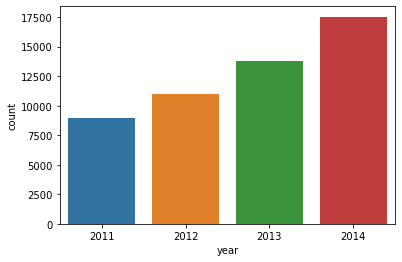

In [18]:
sns.countplot(x='year',data=df)